In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y) 
le.transform(['M', 'B']) # M : 1, B : 0 인코딩결과

array([1, 0])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2, stratify=y, random_state=1)

지금까지 데이터를 전처리하고, 과적합 방지및 최적화를 위해 특성을 추출또는 선택, 마지막으로 데이터 분류 알고리즘을 공부했다.
이제 이 과정을 이해했다면 파이프라인을 통해서 압축해서 한줄의 코드로 이 과정을 끝마칠수 있다.
이를 잘 이해하고 기록해두는게 좋을것이다.

아래는 파이프라인 활용 예시이다.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# 파이프라인 구성,
# StandardScaler()으로 데이터셋 표준화 -> PCA(n_components=2)으로 2개의 가장 높은 분산을 가진 차원으로 매핑, LogisticRegression(random_state=1)으로 모델 훈련
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(penalty='l2',random_state=1))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
pipe_lr.score(X_test, y_test)

0.956140350877193

같은 모델내에서 훈련데이터셋 내부에서 검증데이터셋을 fold:10으로 분리해서 나누고
파이프라인을 통해서 각모델의 훈련결과 점수를 scores에 append한다.
아래는 계층적 k-겹  교차검증 예시코드이다.

이 코드에서는 계층적 분할을 한 후에, 검증 데이터를 반복자를 통해서  점수를 scores에 append한다.

In [6]:
import numpy as np
from sklearn.model_selection import StratifiedKFold 

# 테스트 데이터셋중 폴드를 10회로 지정해서 검증데이터를 나눈다.
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('폴드: %2d, 클래쓰 분포 : %s, 정확도 %.3f' %(k+1, np.bincount(y_train[train]), score))

폴드:  1, 클래쓰 분포 : [256 153], 정확도 0.935
폴드:  2, 클래쓰 분포 : [256 153], 정확도 0.935
폴드:  3, 클래쓰 분포 : [256 153], 정확도 0.957
폴드:  4, 클래쓰 분포 : [256 153], 정확도 0.957
폴드:  5, 클래쓰 분포 : [256 153], 정확도 0.935
폴드:  6, 클래쓰 분포 : [257 153], 정확도 0.956
폴드:  7, 클래쓰 분포 : [257 153], 정확도 0.978
폴드:  8, 클래쓰 분포 : [257 153], 정확도 0.933
폴드:  9, 클래쓰 분포 : [257 153], 정확도 0.956
폴드: 10, 클래쓰 분포 : [257 153], 정확도 0.956


하지만 사실 이런 반복자 필요없이, 사이킷런에서는 교차 검증 함수를 쓸수있게 함수를 제공하고있다.

검증 방법을 배우기 이전:
    전체 데이터셋에 대해 정확도를 받는다. 이는 과대적합 여부나, 편향을 판단하기 힘들것이다.

검증 방법( 계층적 K-교차 검증 방법 )활용시:
    전체 데이터셋에 대한 한번의 정확도 계산이 아니라.
    k분할된 각각의 데이터셋에 대해 정확도를 계산해서, k개의 모델에 대한, k개의 정확도를 받는다.
    이를통해 전체적인 정확도의 분포를보고 과대적합 유무를 판단할수있다.

In [7]:
from sklearn.model_selection import cross_val_score

# estimator= 평가 모델은 파이프라인으로 기존에 지정해둔 (여기서는 표준화처리, PCA특성추출, 로지스틱회기 알고리즘) 모델을 시용
# X= 훈련 특성 데이터셋
# y= 훈련 레이블 데이터셋
# cv= 교차검증 fold 개수
# n_jobs= 사용할 cpu개수 
scores = cross_val_score(estimator=pipe_lr, X= X_train, y= y_train, cv=10, n_jobs=1)
scores

array([0.93478261, 0.93478261, 0.95652174, 0.95652174, 0.93478261,
       0.95555556, 0.97777778, 0.93333333, 0.95555556, 0.95555556])

검증 곡선으로 과대적합과 과소적합을 조사하는 과정을 보여줄것이다.

/home/viplab/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/viplab/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

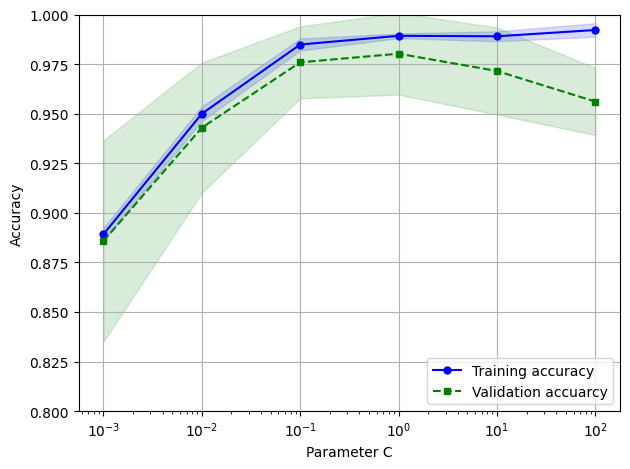

In [8]:
from sklearn.model_selection import validation_curve

pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2',random_state=1))

param_range = [0.001, 0.01, 0.1 , 1.0 , 10.0, 100.0]
train_scores, test_scores = validation_curve(
    estimator= pipe_lr,
    X=X_train,
    y=y_train,
    param_name='logisticregression__C',
    param_range=param_range,
    cv=10
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 시각화 부분 코드
import matplotlib.pyplot as plt

# 훈련데이터셋 정확도
plt.plot(param_range, train_mean, color = 'blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')

# 검증데이터셋 정확도
plt.plot(param_range, test_mean, color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuarcy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

그리드 서치를 통한 하이퍼파라미터 튜닝에 대해서 알아보자.
위는 단일 하이퍼파라미터 C의 변화에 따른 정확도를 알아봤다.

실제 모델에서는 여러 하이퍼 파라미터가 있고, 이들의 조합에 따라 다른 분산이 나타날것이다.
그리드 서치는 이들의 모든 조합을 조사해서 최종적으로 최적의 하이퍼 파라미터 조합을 찾는게 목표이다.

하지만, 이는 특정 데이터셋에 대한 최적의 조합일 뿐이다.
그렇다면 모델 선택과, 모델 하이퍼 파라미터 최적화를 동시에 수행하는건? -> 중첩 교차 검증이다.

전체 데이터셋을 fold = 5 (cv = 5)로 테스트셋, 훈련세트로 나눈다. -> 최적의 매개변수로 훈련
나눠진 각각의 훈련세트를 다시 1:1 (cv = 2) 비율로 나눈다. -> 매개변수를 튜닝
    - 이때 그리드 서치법을 이용해서 각각의 루프마다 최적의 하이퍼파라미터를 계산한다.

각루프마다 그디르 서치를 이용해서 최적의 매개변수를 구하고, 또다시 그걸 5번이나 반복하기때문에 매우 값비싼 계산임을 인지해야한다.

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# param_name에 접근하는 방법표시는 '__'이다. 이 룰을 기억하자.
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1 , 1.0 , 10.0, 100.0, 1000.0]
param_grid = [{'svc__C' : param_range,
               'svc__kernel' : ['linear']},
               {'svc__C' : param_range,
               'svc__gamma' : param_range,
               'svc__kernel' : ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  refit=True,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


이렇듯 'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf' 라는 최적의 파라미터 조합을 찾고,
가장 최적의 성능의 모델을 찾아냈다.

이제는 여러 분류알고리즘으로 만든 모델들을 대조해서, 그 데이터셋에서 어떤 분류 알고리즘이 최적인지 찾아보는것이 목표다.

이는 '중첩 교차 검증'을 통해 수행할수 있다.

In [10]:
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2)

scoresc = cross_val_score(gs, X_train, y_train,
                          scoring='accuracy', cv=5)
print('CV 정확도: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

CV 정확도: 0.950 +/- 0.014


In [11]:
from sklearn.tree import DecisionTreeClassifier

gs_tree = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth' : [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',
                  cv = 2)
scores_tree = cross_val_score(gs, X_train, y_train,
                          scoring='accuracy', cv=5)

print('CV 정확도: %.3f +/- %.3f' %(np.mean(scores_tree), np.std(scores_tree)))

CV 정확도: 0.974 +/- 0.015


SVM의 중첩 교차 검증의 성능이 결정트리의 성능보다 좋다.
이를 통해 새로운 데이터를 분류하기 위해서는 SVM이 더 좋은 선택임을 알수있다.

이 외에도 RRE(정확도), REC(재현율), F1-score(정확도와 재현율의 최적화 위한 점수) 등의 모델 평가 지수가 있다.

먼저 오차행렬에 대해서 알아보자.

In [12]:
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


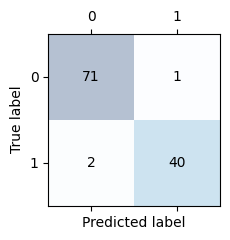

In [13]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

(True label, Predidcted label) 사이킷런에서 양성, 음성 레이블
양성:1, 음성:0
(0, 0) TN: 진짜 음성
(0, 1) FP: 거짓 양성
(1, 0) FN: 거짓 음성
(1, 1) TP :진짜 양성

(1, 0) FN: 거짓 음성 + (1, 1) TP :진짜 양성 = 실제 양성 개수
(0, 0) TN: 진짜 음성 + (0, 1) FP: 거짓 양성 = 실제 음성 개수

In [14]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('정밀도 : %.3f' %precision_score(y_true=y_test, y_pred=y_pred))
print('재현율 : %.3f' %recall_score(y_true=y_test, y_pred=y_pred))
print('F1 점수 : %.3f' %f1_score(y_true=y_test, y_pred=y_pred))

정밀도 : 0.976
재현율 : 0.952
F1 점수 : 0.964


이 정밀도와 재현율의 트레이드 오프 관계를 기반으로 판단하기 위해서 ROC 곡선을 그린다.
ROC 곡선 대각선의 아래 면적 : ROC AUC 의 값의 크기가 정확도와 비례한다 볼수있다.

참고로 ROC 대각선 곡선 아래: 랜덤 추출보다 못한 성능

참고로 ROC 대각선 곡선 위: 랜덤 추출보다 나은 성능

TPR:1, FPR:0 왼쪽 위 구석 : 완변한 분류가(이론상) 

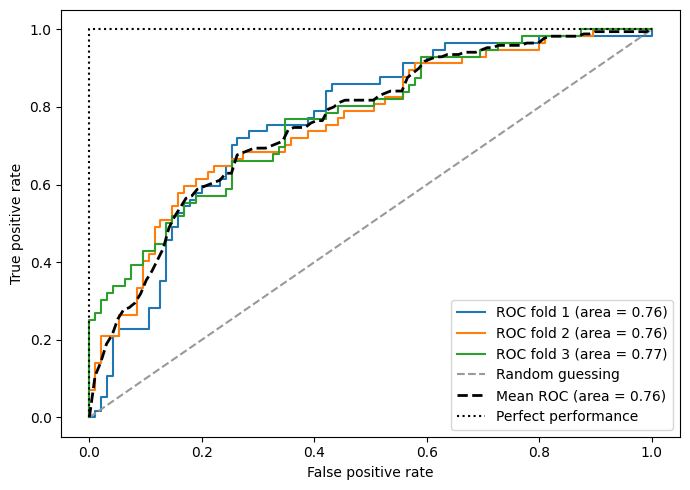

In [20]:
from sklearn.metrics import roc_curve, auc
from numpy import interp

pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(penalty='l2', random_state=1, C=100.0))
X_train2 = X_train[:, [4, 14]]

# 전체 X_train, y_train에 대해 3개의 폴드로 나눈다. 
# cv는 행당 train, test 데이터의 '인덱스'배열이 들어있다. 다시 강조하지만 '인덱스'가 아래 규칙에 따라 저장돼있는거다.
cv = list(StratifiedKFold(n_splits=3, shuffle=True, random_state=1).split(X_train, y_train))
fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100) # 0 ~ 1 까지 100개의 동일한 간격을 가진 숫자를 생성한다. 0, 0.01, 0.02 .... x축 기준점 역할
# confmat
# [[71  1]
# [ 2 40]]
for i, (train, test) in enumerate(cv):
    # 위의 로지스틱 회귀 분류기를 이용한 모델에 각 train, test로 데이터 훈련 후, test의 기준으로 예측 확률을 반환.
    # 테스트 데이터셋에 대한 클래쓰 예측확률을 반환한다. [0일확률(음성확률), 1일확률(양성확률)] 반환
    probas = pipe_lr.fit(X_train2[train]
                         ,y_train[train]).predict_proba(X_train2[test])
    
    # thersholds 임계값 : y_score의 값이다. 이 값을 기준으로 양성, 음성값을 분류한다. -> probas[:, 1]
    # fpr: 각 가능한 임계 값에 대해 계산된 거짓 양성비율
    # tpr: 각 가능한 임계 값에 대해 계산된 진짜 양성비율
    fpr, tpr, threholds = roc_curve(y_train[test],# 테스트 데이터의 실제 레이블
                                    probas[:, 1], # 데이터의 실제 양성값 확률 모음
                                    pos_label=1)  # pos_label=1은 1을 양성 클래스 레이블로 지정한다는뜻
    
    mean_tpr += interp(mean_fpr, fpr, tpr) # 평균 ROC 곡선을 그린다.
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC fold %d (area = %0.2f)' %(i+1, roc_auc))

plt.plot([0,1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' %mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


그런데 결국 우리의 목표는 단일 모델 내에서의 평가가 아니라, ROC 곡선의 아래면적의 평균값을 비교해서 '모델간의' 비교가 핵심이다.

그렇다면 그냥 AUC값만 간결하게 얻는게 좋을것이다.

In [26]:
from sklearn.metrics import roc_auc_score

# 예측모델 파이프라인으로 생성
# 참고로 차원을 무려 2개로 축소해서 이는 정확도가 다소 떨어지는 모델이다.
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(penalty='l2', random_state=1, C=100.0))
X_train2, X_test2 = X_train[:, [4, 14]], X_test[:, [4, 14]]
pipe_lr.fit(X_train2, y_train)

# 예측 확률계산
probas = pipe_lr.predict_proba(X_test2)[:,1]

# AUC 점수 계산
auc_score = roc_auc_score(y_test, probas)
auc_score


0.7394179894179893

불균형한 클래스를 다루는 법을 알아볼것이다.
클래스의 분포자체가 매우 불균형적이면 예측 정확도가 모델의 성능을 대표하기 힘들수있다.

방법1. '소수'개수 클래스에 '큰'가중치
방법2. resampling 또는 downsampling으로 클래스 분포를 군형 맞추기
resampling : 소수 클래스 샘플을 늘려서 균형 맞춘다. 과적합의 가능성이 있다.
downsampling : 다수 클래스 샘플을 제거해서 균형 맞춘다. 정보 손실의 가능성이 있다. 

In [29]:
# 357개의 음성종양(원래 데이터셋 음성종양개수다) 40개의 양성 음성종양 데이터셋 현재 1:9 비율정도로 매우 불균형적인 데이터셋이 생성됐따.
X_imb = np.vstack((X[y==0], X[y==1][:40]))
y_imb = np.hstack((y[y==0], y[y==1][:40]))

# 방법1. '소수'개수  클래스에 '큰'가중치 -> class_weight - 'balanced'
from sklearn.utils import resample
print('리샘플링 하기전에 양성개수',X_imb[y_imb == 1].shape[0])

X_upsampled, y_upsampled = resample(X_imb[y_imb == 1],
                                    y_imb[y_imb == 1],
                                    replace=True,
                                    n_samples=X_imb[y_imb == 0].shape[0], # y_imb == 0 인개수, 즉 음성 종양 레이블 개수에 맞춰서 리샘플링
                                    random_state=1)
print('리샘플링 후 양성개수',X_upsampled.shape[0])

리샘플링 하기전에 양성개수 40
리샘플링 후 양성개수 357
